In [1]:
%matplotlib inline
import math  # 標準のmathモジュール

import numpy as np  # NumPy
import pandas as pd  # Pandas

from matplotlib import pylab as plt  # Matplotlib

# matplotlibで日本語表示する為の指定
import japanize_matplotlib

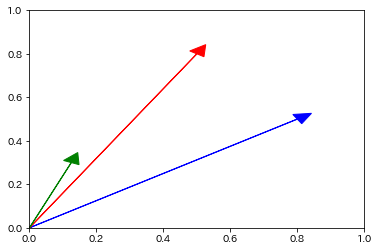

In [2]:
# 説明用グラフ(これにθ書いて赤と青より赤と緑の方が近い的な)
plt.arrow(
    0, 0, 0.8, 0.5,
    head_width=0.05, head_length=0.05,
    fc='blue', ec='blue')
plt.arrow(
    0, 0, 0.5, 0.8,
    head_width=0.05, head_length=0.05,
    fc='r', ec='r')
plt.arrow(
    0, 0, 0.125, 0.3,
    head_width=0.05, head_length=0.05,
    fc='g', ec='g')

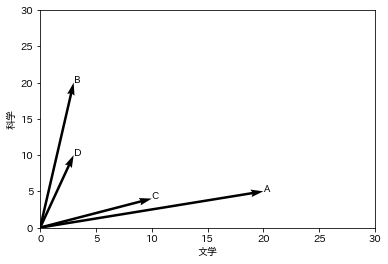

In [3]:
fig, ax = plt.subplots()
plt.xlabel('文学')
plt.xlim([0, 30])
plt.ylabel('科学')
plt.ylim([0, 30])

score = {'A': [20, 5], 'B': [3, 20], 'C': [10, 4], 'D': [3, 10]}

for k, v in score.items():
    ax.annotate(k, xy=(v[0], v[1]))
    ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1)

In [4]:
def cosine_distance(x, y):
    """
    コサイン距離
    :param x: x
    :param y: y
    :return: コサイン距離
    """
    return 1 - x.dot(y) / (np.linalg.norm(x) * np.linalg.norm(y))

In [5]:
# NumPyの関数を使うために、リストをnp.arrayに変換する
score = {'A': np.array([20, 5]), 'B': np.array([3, 20]), 'C': np.array([10, 4]), 'D': np.array([3, 10])}

index = list()
data = list()

for i in score.keys():
    for j in score.keys():
        index.append('{}さんと{}さん'.format(i, j))
        data.append([cosine_distance(score[i], score[j])])

pd.DataFrame(data, index=index, columns=['コサイン距離'])

,コサイン距離
AさんとAさん,1.110223e-16
AさんとBさん,6.162363e-01
AさんとCさん,9.169832e-03
AさんとDさん,4.889246e-01
BさんとAさん,6.162363e-01
BさんとBさん,0.000000e+00
BさんとCさん,4.949876e-01
BさんとDさん,1.014545e-02
CさんとAさん,9.169832e-03
CさんとBさん,4.949876e-01


In [6]:
import scipy.spatial

scipy.spatial.distance.cosine(score['A'], score['B'])

0.6162363256574974

In [7]:
from scipy.stats import pearsonr

# Jリーグ選手
soccer = pd.read_csv('../../9_data/サッカー/Jリーグ選手身長体重.csv')
pearsonr(soccer['身長'], soccer['体重'])[0]

0.831233599481403

In [8]:
import scipy

# 前処理として、全員の身長と体重から平均値を引き算して、平均身長と平均体重を0に整える
soccer['身長'] = soccer['身長'] - np.mean(soccer['身長'])
soccer['体重'] = soccer['体重'] - np.mean(soccer['体重'])

scipy.spatial.distance.cosine(soccer['身長'], soccer['体重'])

0.16876640051859704

In [9]:
import scipy

1 - scipy.spatial.distance.cosine(soccer['身長'], soccer['体重'])

0.831233599481403

In [10]:
# データ
score = {'A': np.array([20, 5]), 'B': np.array([3, 20]), 'C': np.array([10, 4]), 'D': np.array([3, 10])}

In [11]:
# 正解例
import scipy

index = list()
data = list()

for i in score.keys():
    for j in score.keys():
        index.append('{}さんと{}さん'.format(i, j))
        data.append([1 - scipy.spatial.distance.cosine(score[i], score[j])])

pd.DataFrame(data, index=index, columns=['コサイン類似度'])

,コサイン類似度
AさんとAさん,1.000000
AさんとBさん,0.383764
AさんとCさん,0.990830
AさんとDさん,0.511075
BさんとAさん,0.383764
BさんとBさん,1.000000
BさんとCさん,0.505012
BさんとDさん,0.989855
CさんとAさん,0.990830
CさんとBさん,0.505012
